# Trabajo en grupo 2018 - Filtros de imágenes

## Versión: monohilo

## Autores:
 - Álvaro Baños Gomez, UO245853.
 - Guillermo Facundo Colunga, UO236856.
 - Alejandro León Pereira, UO258774.
 - Iñaki Salgado Uralde, UO237133.

## Enunciado

Programa monohilo secuencial en C/C++ que implemente operaciones vectoriales sobre las componentes de imágenes digitales. El programa monohilo a desarrollar consiste en la implementación básica de las operaciones y se tomará como referencia para el cálculo de las aceleraciones obtenidas en las implementaciones posteriores.

> **Nota:** _Para mejorar la resolución de la medida de intervalos de tiempo, el procesamiento vectorial debería tener una duración entre 5 y 10 segundos, por lo que si una sola ejecución del algoritmo no dura lo suficiente, se repetirá (en bucle) el número de veces necesario para alcanzar esos tiempos._

Una vez realizado el programa, éste debe ejecutarse 10 veces en modo Release y calcular la media y la desviación típica del tiempo de respuesta, reflejando todas las medidas obtenidas y las estadísticas en una tabla de la documentación.

### Representación del problema

Para representar las imágenes en C++ utilizaremos la librería CImg con el formato `float`. Esta librería carga la imágen en un único vector compuesto por todas las componentes de la imágen, en nuestro caso con tipo `float`. Para nuestro problema serán imágenes RGB. De forma que:

$$imagen_x = [ r_{x1}, r_{x2}, r_{x3},...,r_{xn}, g_{x1}, g_{x2}, g_{x3},...,g_{xn}, b_{x1}, b_{x2}, b_{x3},...,b_{xn}]$$

Para cada componente tenemos $ancho \cdot alto$ elementos. Para esta fase crearemos 3 punteros para cada imagen, uno para cada componente de la imagen $x$: rojo, verde y azul. Y se inicializan de la siguiente forma:

$$rojo_x = r_{x1}$$

$$verde_x = g_{x1}$$

$$azul_x = b_{x1}$$

De esta forma podemos usar los punteros para acceder a los dintintos elementos de las componenetes en lugar de computar la posición cada vez que queramos acceder a un elemento de una componente.

## Algoritmo a imlementar

El algoritmo asignado es el de fusionar dos imágenes con el modo amplitud. Para conseguir el modo amplitud los vectores R' G' y B', que representan las componentes de la imagen resultante, se calculan de la siguente manera:

$${R'} = \frac{\sqrt{Ra^{2} + Rb^{2}}}{\sqrt{2}}$$

$${G'} = \frac{\sqrt{Ga^{2} + Gb^{2}}}{\sqrt{2}}$$

$${B'} = \frac{\sqrt{Ba^{2} + Bb^{2}}}{\sqrt{2}}$$

De las fórmulas anteriores se podría extrapolar lasiguiente función de transformación sobre los vectores de información de $imagen_{x}$ e $imagen_{y}$:

$$f(imagen_{xi}, imagen_{yi}) = \left ( \frac{\sqrt{imagen_{xi}^{2} + imagen_{yi}^{2}}}{\sqrt{2}} \right )$$

Y por lo tanto usar un único bucle que recorriera todo el vector de información de las imágenes aplicando la fórmula de transformación anterior. Pero por simplificar, se usarán los punteros anteriormente definidos y las fórmulas individuales de las componentes.

Para entender mejor la fusión de imágenes en modo amplitud puedes leerte este notebook ( [ipynb](image-amplitude-fusion.ipynb), [html](image-amplitude-fusion.html) ). En él se explica y analiza la función de transformación.

## Entorno de trabajo.

Como entorno de trabajo se usará una máquina virtual ubuntu y el IDE Eclipse para C/C++. La máquina virtual se configura con 4 procesadores, que se corresponde con el máximo número de procesadores que contiene el sistema donde se ejecuta la máquina virtual. Dicha configuración se ilustra con la siguiente imágen.

![conf_img](https://github.com/thewilly/GIISOF01-2-002-Arquitectura-Computadores/raw/master/notebooks/data/configuration.png)

Para ver la configuración final de la cpu de la máquina virtual encontrarás el archo cpu-info en el directorio `/data`.

### Algoritmo implementado

Para resolver el problema descrito se procede a realizar un algoritmo en p-seudo código que aplique la función de transformación descrita sobre las diferentes componentes individuales de los vectores `R`, `G`y `B`.

#### Pseudo-código
```
PARA CADA i DESDE i=0 HASTA i < número_pixeles_imagen
        
    comp_rojo_img_c[i] = sqrt(comp_rojo_img_a[i]^2 + comp_rojo_img_b[i]^2) / sqrt(2)
        
    comp_verde_img_c[i] = sqrt(comp_verde_img_a[i]^2 + comp_verde_img_b[i]^2) / sqrt(2)
        
    comp_azul_img_c[i] = sqrt(comp_azul_img_a[i]^2 + comp_azul_img_b[i]^2) / sqrt(2)
```

Una vez tenemos el algoritmo diseñado, procederemos implementarlo en C++, por restricciones del proyecto. La siguiente implementación del algoritmo está diseñada para realizar operaciones de forma iterativa sobre los vectores de las distintas componentes. En lugar de tres vectores, uno para componente de las imágenes se emplearán punteros que nos permitirán desplazarnos por el vector de datos de cada imagen.

#### C++
```c++
for (int i = 0; i < nPixels; i++) {
    *pRnew = sqrtf(pow(*pRcomp_1, 2.0f) + pow(*pRcomp_2, 2.0f)) / SQRT2;
    *pGnew = sqrtf(pow(*pGcomp_1, 2.0f) + pow(*pGcomp_2, 2.0f)) / SQRT2;
    *pBnew = sqrtf(pow(*pBcomp_1, 2.0f) + pow(*pBcomp_2, 2.0f)) / SQRT2;

    pRnew++; pRcomp_1++; pRcomp_2++;
    pGnew++; pGcomp_1++; pGcomp_2++;
    pBnew++; pBcomp_1++; pBcomp_2++;
}
```

Se puede encontrar la implementación completa en [Main.cpp](https://github.com/thewilly/GIISOF01-2-002-Arquitectura-Computadores/blob/master/Singlethread/Src/Main.cpp).

> **Nota**: _Como la ejecucion del algoritmo dura menos de 5 segundos se anida el anterior algoritmo dentro de un bucle for que lo repetirá 25 veces con lo que el tiempo de la ejecución del programa será superior a los 5 segundos, **pero se estará ejecutando el algoritmo 25 veces**._

> **Nota**: _En el agortimo anterior se ha realizado en lugar de computar el valor sqrt(2) cada vez que se necesita se abstrae a una constante definida al inicio del Main.cpp._

> **Nota**: _Como se puede ver en el algoritmo no se realiza ningún tipo de validación sobre los datos resultantes de aplicar la función de transformación, esto es, por que durante el análisis se probó que para valores de entrada en un rango [0.0, ..., 255.0] los valores resultantes estarán siempre comprendidos en ese mismo rango._

### Análisis del algoritmo implementado
Para la ejecución del algoritmo anterior se obtienen los siguientes datos tras realizar 10 ejecuciones en modo release:

In [1]:
import pandas as pd
executions = 25.0
data = pd.Series([5.473878, 5.459996, 5.440931,5.441643,5.451255,5.437835,5.452547,5.544019,5.443557,5.450508],
                 index=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
unique_executions = data/executions
table = pd.DataFrame({'Duración (s) X 3 Ejecuciones':data})
table

,Duración (s) X 3 Ejecuciones
1,5.473878
2,5.459996
3,5.440931
4,5.441643
5,5.451255
6,5.437835
7,5.452547
8,5.544019
9,5.443557
10,5.450508


De la tabla anterior podemos obtener un histograma con la frecuencia con la que se obtienen los distintos tiempos de ejecución del algoritmo (para 1 única ejecución). De él se puede deducir que la mayoría de las ejecuciones están centradas en torno a 0.218 segundos. Lo que a priori parece ser la media para 1 única ejecución de nuestro algoritmo.

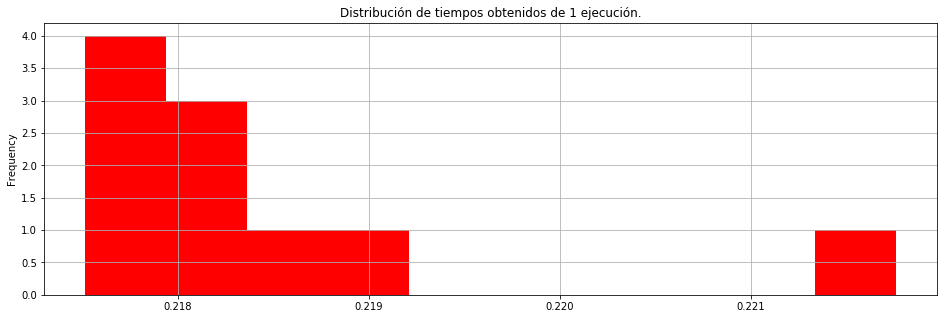

In [3]:
import matplotlib.pyplot as plt
unique_executions.plot(kind='hist',color='red',
                        grid=True, title='Distribución de tiempos obtenidos de 1 ejecución.',
                        figsize=(16,5))
plt.show()

In [4]:
import numpy as np
mean = np.mean(data)
std = np.std(data)
print("Media", executions,"ejecuciones:", mean, "s.")
print("Desviación estándar", executions,"ejecuciones:", std)
print("Media 1 ejecución:", np.mean(unique_executions), "s.")

Media 25.0 ejecuciones: 5.4596169 s.
Desviación estándar 25.0 ejecuciones: 0.0298909845721
Media 1 ejecución: 0.218384676 s.


## Conclusiones

Para el problema dado: 
- Se diseñó un algoritmo iterativo que aplica la función de transformación dada a los dinstintos elementos de las componentes RGB de 2 imágenes y crea una tercera. 
- Tras 10 muestreos se puede decir que dicho algoritmo es capáz de procesar 1 imágen cada $0.218384676$ segundos. O lo que es lo mismo, $4.6$ imágenes por segundo.